# Problema 1

Consideremos el siguiente problema de valor inicial:

\begin{align*}
      &y'= 2y/t + t^2 \cdot e^t \quad x\in[1,2],\\
      &y(1)=0.
\end{align*}

Aproximar la solución con $h=0.1$ usando:

1. El método de **Euler**.
2. El método de **Euler-Cauchy** (también conocido como Euler modificado).
3. El método de **Heunn** (también conocido como Euler mejorado).

Comparar, en ambos casos, con la solución aproximada que proporciona Python (función `odeint`, localizada en `scipy.integrate`).

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def f(t,y): return 2*y/t + t**2 * exp(t)
a, b = 1, 2
y_a = 0
h = 0.1

## 1. Método de Euler

In [3]:
def euler(f, y_a, a, b, h):
    """
    Calcula la solución de y'=f(t,y) mediante el mét. Euler.
    
    Argumentos:
           f : Función f(t,y) que defien a la EDO
         y_a : Condición inicial en t=a
        a, b : Extremos del intervalo temporal
           h : Paso de tiempo
    Valores devueltos:
        lista_t : Soporte de puntos, t_i, utilizados
        
    """
    N = int( round((b-a)/h) )
    
    lista_t = linspace(a, b, N+1)
    sol = [y_a]
    yn = y_a
    for i in range(N): # i = 0, 1, ..., N-1
        tn = lista_t[i]
        yn1 = yn + h * f(tn, yn) # Método de Euler
        sol.append(yn1)
        yn = yn1 # Actualizo yn para próxima iteración
    return lista_t, sol

lista_t, sol_euler = euler(f, y_a, a, b, 0.1)

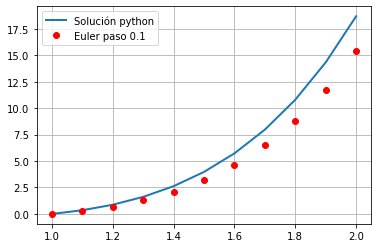

In [4]:
# solución mediante python
from scipy.integrate import odeint
def func(y, t): return f(t, y)
sol_python = odeint(func, y_a, lista_t)

plot(lista_t, sol_python, lw=2, label=u'Solución python')
plot(lista_t, sol_euler, 'o', c='red', label='Euler paso ' + str(h))
legend(loc='best')
grid()

## 2. Euler-Cauchy

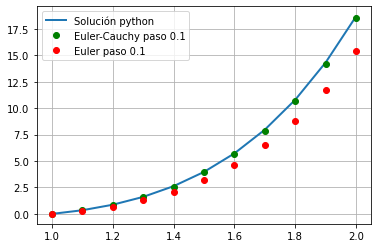

In [5]:
def euler_cauchy(f, y_a, a, b, h):
    """Calcula la solución de y'=f(t,y) mediante el mét. Euler-Cauchy"""
    N = int( round((b-a)/h) )
    
    soporte = linspace(a, b, N+1)
    sol = [y_a]
    yn = y_a
    for i in range(N): # i = 0, 1, ..., N-1
        tn = soporte[i]
        k1 = f(tn, yn)
        k2 = f(tn+h/2, yn+h/2*k1)
        yn1 = yn + h*k2
        sol.append(yn1)
        yn = yn1 # Actualizo yn para la próxima iteración
    return soporte, sol

lista_t, sol_euler_cauchy = euler_cauchy(f, y_a, a, b, 0.1)

# solución mediante python
from scipy.integrate import odeint
def func(y, t): return f(t, y)
sol_python = odeint(func, y_a, lista_t)

plot(lista_t, sol_python, lw=2, label=u'Solución python')
plot(lista_t, sol_euler_cauchy, 'o', c='green', label='Euler-Cauchy paso ' + str(h))
plot(lista_t, sol_euler, 'o', c='red',  label='Euler paso ' + str(h))
legend(loc='best')
grid()

## 3. Heunn

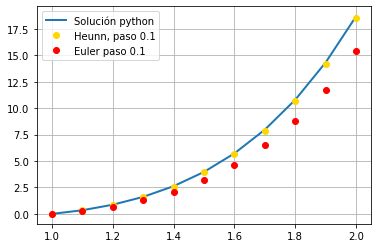

In [6]:
def heunn(f, y_a, a, b, h):
    """Calcula la solución de y'=f(t,y) mediante el método de Heunn"""
    N = int( round((b-a)/h) )
    
    lista_t = linspace(a, b, N+1)
    sol = [y_a]
    yn = y_a
    for i in range(N): # i = 0, 1, ..., N-1
        tn = lista_t[i]
        k1 = f(tn,yn)
        k2 = f(tn + h, yn + h*f(tn,yn))
        yn1 = yn + h/2*(k1+k2)
        sol.append(yn1)
        yn = yn1 # Actualizo yn para la próxima iteración
    return lista_t, sol

lista_t, sol_euler_cauchy = euler_cauchy(f, y_a, a, b, 0.1)

# solución mediante python
from scipy.integrate import odeint
def func(y, t): return f(t, y)
sol_python = odeint(func, y_a, lista_t)

plot(lista_t, sol_python, lw=2, label=u'Solución python')
plot(lista_t, sol_euler_cauchy, 'o', c='gold', label='Heunn, paso ' + str(h))
plot(lista_t, sol_euler, 'o', c='red',  label='Euler paso ' + str(h))
legend(loc='best')
grid()